In [1]:
import pandas as pd

errorlogs = pd.read_pickle('errlogs.pkl')
# found thanks to clustering! 
suspicious_cids = [70715, 70716, 74459, 74460, 74461, 74463, 74464]
for cid in suspicious_cids:
    errorlogs = errorlogs[errorlogs.cid != cid]


In [2]:
len(errorlogs)

3531

In [3]:
errorlogs.loc[3]['error_message']

'make[4]: flex: Command not found\nmake[4]: *** [/TuxML/linux-4.13.3/drivers/scsi/aic7xxx/aicasm//aicasm_scan.c] Error 127\nmake[3]: *** [drivers/scsi/aic7xxx/aicasm/aicasm] Error 2\nmake[2]: *** [drivers/scsi/aic7xxx] Error 2\nmake[1]: *** [drivers/scsi] Error 2\nmake[1]: *** Waiting for unfinished jobs....\nmake: *** [drivers] Error 2\n'

In [4]:
from enum import Enum, auto
class ErrorLog(Enum):
    BLACKLIGHT = auto(),
    BLACKLIGHT2 = auto(),
    CONFIG_NLS_DEFAULT = auto(),
    CRC32_CLUSTER = auto(),
    V4L2 = auto(), 
    OVERFLOW2 = auto(), 
    ULPI = auto(), 
    PCM = auto(),
    TTM = auto(), 
    AS68K = auto(), 
    GEN = auto(), 
    AICDB = auto(), 
    AIC7XXX = auto(),
    DRM_BRIDGE_CLUSTER = auto(),
    PINCTRL_CLUSTER = auto(), 
    BTBCM = auto(),
    BPFFANCY = auto(), 
    DEVM = auto(), 
    DEVM2 = auto(), 
    I2C_CLUSTER = auto() 
    


    

patterns = { ErrorLog.BLACKLIGHT : "undefined reference to `backlight_device",
            ErrorLog.BLACKLIGHT2: 'error: ‘intel_backlight_device_register’', # 'intel_backlight_device_register', # cid 87044 does not match BACKLIGHT 
            ErrorLog.CONFIG_NLS_DEFAULT : "CONFIG_NLS_DEFAULT",
            ErrorLog.CRC32_CLUSTER : 'undefined reference to `crc32', 
            ErrorLog.V4L2 : 'undefined reference to `v4l2',
            ErrorLog.OVERFLOW2 : '__read_overflow2',
            ErrorLog.ULPI : 'undefined reference to `ulpi', # 100-126K dataset
            ErrorLog.PCM : 'undefined reference to `atmel_pcm_dma_platform', # 100-126K dataset
            ErrorLog.TTM : 'undefined reference to `ttm', 
            ErrorLog.AS68K: 'as68k: not found',
            ErrorLog.GEN : 'undefined reference to `gen_pool', 
            ErrorLog.AIC7XXX: '[drivers/scsi/aic7xxx/aicasm/aicasm] Error 2', #'drivers/scsi/aic7xxx',
            ErrorLog.AICDB : 'aicdb.h: No such file or directory', 
            ErrorLog.DRM_BRIDGE_CLUSTER : 'undefined reference to `drm_panel_bridge_add', 
            ErrorLog.PINCTRL_CLUSTER : '[drivers/pinctrl/pinctrl-mcp23s08.o] Error', #'pinctrl-mcp23s08', # loosely pattern (too general?)
            ErrorLog.BTBCM : 'undefined reference to `btbcm_set_bdaddr', 
            ErrorLog.BPFFANCY : 'bpf-fancy', # loosely pattern (too general?)
            ErrorLog.DEVM : 'undefined reference to `__devm_regmap',
            ErrorLog.I2C_CLUSTER: 'error: implicit declaration of function ‘i2c_get_adapter’', #'i2c_get_adapter',
            ErrorLog.DEVM2 : 'undefined reference to `devm_of_led'
           }

pattern_name = [name for name, member in ErrorLog.__members__.items()]
error_pattern = pd.DataFrame(columns=pattern_name, index=errorlogs['cid'])
error_pattern.fillna(False, inplace=True)

for i, errorlog in errorlogs.iterrows():
    error = errorlog['error_message']
    cid = errorlog['cid']
    for k, p in patterns.items():
        if (p in error):
            error_pattern.loc[cid][k.name] = True
            #print (k.name, "found in configuration", cid)
            
            
            


In [5]:
# same, except we use the first error message (and only it)
# it mimics basic Linux build process
# see discussion here: https://github.com/TuxML/compilation-analysis/issues/1#issuecomment-488711237

pattern_name = [name for name, member in ErrorLog.__members__.items()]
error_patternfirst = pd.DataFrame(columns=pattern_name, index=errorlogs['cid'])
error_patternfirst.fillna(False, inplace=True)

for i, errorlog in errorlogs.iterrows():
    error = errorlog['error_message']
    cid = errorlog['cid']
    #print(cid)
    for err in error.splitlines():
        found = False
        for k, p in patterns.items():
            if found:
                break
            if (p in err):
                error_patternfirst.loc[cid][k.name] = True
                found = True
                #print (k, "found")
        if found:
            break
    #for k, p in patterns.items():
    #    if (p in error):
    #        error_patternfirst.loc[cid][k.name] = True
            #print (k.name, "found in configuration", cid)

In [6]:
error_patternfirst

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,GEN,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER
cid,,,,,,,,,,,,,,,,,,,,
30699,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
30700,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
30704,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
30717,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
30718,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
30722,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
30726,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
30730,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30731,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [7]:
#error_pattern.loc[99949]['BLACKLIGHT'] = True
error_pattern['CONFIG_NLS_DEFAULT'].value_counts()
#error_pattern.hist()

False    3526
True        5
Name: CONFIG_NLS_DEFAULT, dtype: int64

BLACKLIGHT              10
BLACKLIGHT2              1
CONFIG_NLS_DEFAULT       5
CRC32_CLUSTER            2
V4L2                     9
OVERFLOW2               86
ULPI                     0
PCM                      0
TTM                     11
AS68K                  550
GEN                    279
AICDB                 2514
AIC7XXX               2681
DRM_BRIDGE_CLUSTER       3
PINCTRL_CLUSTER          3
BTBCM                    2
BPFFANCY                 2
DEVM                     2
DEVM2                    1
I2C_CLUSTER              1
dtype: int64

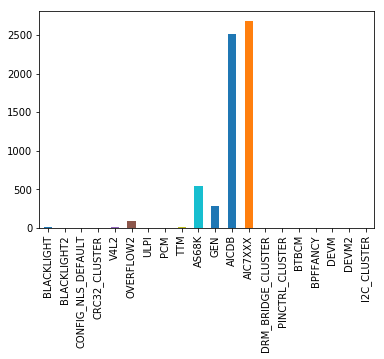

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline  

def nb_patterns(row):
    return sum(row == True)                    
error_pattern['nb_patterns'] = error_pattern.apply(nb_patterns, axis=1)
pattern_frequencies = error_pattern[pattern_name].apply(nb_patterns, axis=0)
pattern_frequencies.plot(kind='bar')
pattern_frequencies

BLACKLIGHT              10
BLACKLIGHT2              1
CONFIG_NLS_DEFAULT       5
CRC32_CLUSTER            2
V4L2                     9
OVERFLOW2               86
ULPI                     0
PCM                      0
TTM                     11
AS68K                  478
GEN                    277
AICDB                 2476
AIC7XXX                162
DRM_BRIDGE_CLUSTER       3
PINCTRL_CLUSTER          3
BTBCM                    2
BPFFANCY                 2
DEVM                     2
DEVM2                    1
I2C_CLUSTER              1
dtype: int64

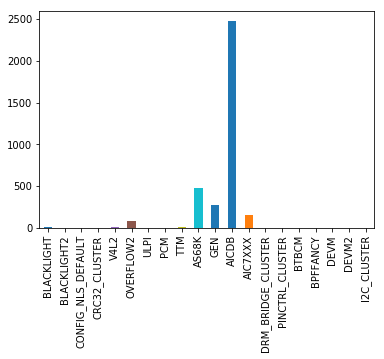

In [9]:
import numpy as np 
# error_patternfirst['nb_patterns'] = error_patternfirst.apply(nb_patterns, axis=1)
patternfirst_frequencies = error_patternfirst[pattern_name].apply(nb_patterns, axis=0)
patternfirst_frequencies.plot(kind='bar')
patternfirst_frequencies
# np.unique(error_patternfirst['nb_patterns'].values)

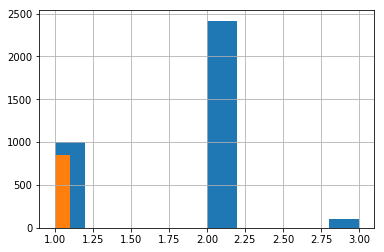

In [10]:
error_pattern['nb_patterns'].hist()
error_pattern.query("AIC7XXX == False")['nb_patterns'].hist()

In [11]:
error_pattern.sort_values(by='nb_patterns', ascending=False)[:20]

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
68566,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
59360,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
57646,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
51532,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
79222,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
46328,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
37984,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
44012,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
72724,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3


In [50]:
#error_pattern['CONFIG_NLS_DEFAULT'].value_counts().plot(kind='bar')
error_pattern.query('nb_patterns == 0')

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,


In [13]:
error_pattern.query('nb_patterns == 0').shape

(0, 21)

In [14]:
for cid in error_pattern.query('nb_patterns == 0').index:
    print ("configuration cid", cid)
    #if cid in suspicious_cids:
    #    print("false positive failure")
    #    continue
    
    error_message = errorlogs.query("cid == " + str(cid))['error_message'].values
    for err in error_message[0].splitlines():
        if "Cyclomatic" not in err:
            print (err)
    print()
    print()
    print()
    
# 74459, 74460, 74461, 74463, 74464

In [15]:
error_pattern.query('nb_patterns >= 2 & (AS68K == True & AIC7XXX == False)').sort_values(by='nb_patterns', ascending=False)



,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,


In [16]:
error_pattern.query('nb_patterns >= 2 & (AS68K == False & AIC7XXX == False & AICDB == True)').sort_values(by='nb_patterns', ascending=False)


,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,


In [17]:
#error_pattern.query('nb_patterns == 2 & (as68k == False & AIC7XXX == True)').sort_values(by='nb_patterns', ascending=False)
error_pattern.query('nb_patterns >= 2 & (AS68K == False & AICDB == False & AIC7XXX == True)').sort_values(by='nb_patterns', ascending=False)


,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,


In [18]:
error_pattern.query('nb_patterns >= 2 & (AS68K == False & AIC7XXX == False)').sort_values(by='nb_patterns', ascending=False)


,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
60939,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2
78770,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2


In [19]:
# masking effect
error_pattern.query('nb_patterns >= 2 & CONFIG_NLS_DEFAULT == True').sort_values(by='nb_patterns', ascending=False)
error_pattern.query('CONFIG_NLS_DEFAULT == True').sort_values(by='nb_patterns', ascending=False)


,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
44596,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
52277,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
60391,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
62743,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
99949,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [20]:
# masking effect
error_pattern.query('GEN == True').sort_values(by='nb_patterns', ascending=False)

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
78770,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2
60939,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2
30821,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
79950,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
79434,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
79281,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
78932,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
78821,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
78740,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [21]:
error_pattern.query('BLACKLIGHT == True').sort_values(by='nb_patterns', ascending=False)

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
59503,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
64086,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
65670,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
66938,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
67750,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
75145,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
81720,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
89618,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
93674,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [22]:
# nice masking effect!
error_pattern.query('PINCTRL_CLUSTER == True & (AS68K == False & AIC7XXX == False)').sort_values(by='nb_patterns', ascending=False)

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
37227,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1
89854,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1
98605,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1


In [23]:
# nice masking effect!
error_pattern.query('I2C_CLUSTER == True & (PINCTRL_CLUSTER == False & AS68K == False & AIC7XXX == False)').sort_values(by='nb_patterns', ascending=False)

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32_CLUSTER,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE_CLUSTER,PINCTRL_CLUSTER,BTBCM,BPFFANCY,DEVM,DEVM2,I2C_CLUSTER,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
96730,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1


In [24]:
import json
# see Hugo notebook here!
with open("option_columns.json","r") as f:
    option_columns = json.load(f)


In [25]:
rawtuxdata = pd.read_csv("dataset_after_encoding.csv", dtype={k:"int8" for k in option_columns})
rawtuxdata.info(memory_usage='deep')
rawtuxdata.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69362 entries, 0 to 69361
Columns: 12654 entries, X86_LOCAL_APIC to cid
dtypes: float64(6), int64(37), int8(12611)
memory usage: 857.0 MB


(69362, 12654)

In [43]:
set(errorlogs['cid']) - set(rawtuxdata['cid'])

24

In [35]:
basic_head = ["cid", "time", "date"] # "compile"
compilation_status_column_name = 'compile_success'
size_methods = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", 
              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]

In [36]:
print(str(len(rawtuxdata)) + " before the removal of some entries (those with same configurations)")
# tuxdata.drop_duplicates(subset=tuxdata.columns.difference(['vmlinux']), inplace=True)
rawtuxdata.drop_duplicates(subset=rawtuxdata.columns.difference(size_methods).difference(basic_head), inplace=True)
print(str(len(rawtuxdata)) + " after the removal of some entries (those with same configurations)")

69362 before the removal of some entries (those with same configurations)
69362 after the removal of some entries (those with same configurations)


In [41]:
cid_errors_not_in_configdata = set(errorlogs['cid']) - set(rawtuxdata['cid'])
for cid in cid_errors_not_in_configdata:
    error_message = errorlogs.query("cid == " + str(cid))['error_message'].values
    for err in error_message[0].splitlines():
        if "Cyclomatic" not in err:
            print (err)
    

aicasm_symbol.c:48:19: fatal error: aicdb.h: No such file or directory
 #include "aicdb.h"
                   ^
compilation terminated.
aicasm_gram.tab.c: In function 'yyparse':
aicasm_gram.tab.c:1628:16: warning: implicit declaration of function 'yylex' [-Wimplicit-function-declaration]
aicasm_macro_gram.tab.c: In function 'mmparse':
/TuxML/linux-4.13.3/drivers/scsi/aic7xxx/aicasm//aicasm_macro_gram.c:64:25: warning: implicit declaration of function 'mmlex' [-Wimplicit-function-declaration]
 #define yylex           mmlex
                         ^
aicasm_macro_gram.tab.c:1199:16: note: in expansion of macro 'yylex'
aicasm_scan.l: In function 'yylex':
aicasm_scan.l:420:6: warning: implicit declaration of function 'mm_switch_to_buffer' [-Wimplicit-function-declaration]
      yy_switch_to_buffer(temp_state);
      ^~~~~~~~~~~~~~~~~~~
aicasm_scan.l:421:6: warning: implicit declaration of function 'mmparse' [-Wimplicit-function-declaration]
      mm_switch_to_buffer(old_state);
      ^~~~~

drivers/gpu/drm/radeon/radeon_object.c:242:2: warning: #warning Please enable CONFIG_MTRR and CONFIG_X86_PAT for better performance thanks to write-combining [-Wcpp]
 #warning Please enable CONFIG_MTRR and CONFIG_X86_PAT for better performance \
  ^~~~~~~
aicasm_symbol.c:48:19: fatal error: aicdb.h: No such file or directory
 #include "aicdb.h"
                   ^
compilation terminated.
aicasm_gram.tab.c: In function 'yyparse':
aicasm_gram.tab.c:1628:16: warning: implicit declaration of function 'yylex' [-Wimplicit-function-declaration]
aicasm_macro_gram.tab.c: In function 'mmparse':
/TuxML/linux-4.13.3/drivers/scsi/aic7xxx/aicasm//aicasm_macro_gram.c:64:25: warning: implicit declaration of function 'mmlex' [-Wimplicit-function-declaration]
 #define yylex           mmlex
                         ^
aicasm_macro_gram.tab.c:1199:16: note: in expansion of macro 'yylex'
aicasm_scan.l: In function 'yylex':
aicasm_scan.l:420:6: warning: implicit declaration of function 'mm_switch_to_buffer'

In [48]:
# TODO: workaround 
# see issue here: https://github.com/TuxML/compilation-analysis/issues/7
for cid in cid_errors_not_in_configdata:
    errorlogs = errorlogs[errorlogs.cid != cid]
    error_patternfirst = error_patternfirst[error_patternfirst.index != cid]
    error_pattern = error_pattern[error_pattern.index != cid]

errorlogs.shape, error_patternfirst.shape, error_pattern.shape

((3507, 2), (3507, 20), (3507, 21))

BLACKLIGHT              10
BLACKLIGHT2              1
CONFIG_NLS_DEFAULT       5
CRC32_CLUSTER            2
V4L2                     9
OVERFLOW2               83
ULPI                     0
PCM                      0
TTM                     11
AS68K                  474
GEN                    275
AICDB                 2464
AIC7XXX                161
DRM_BRIDGE_CLUSTER       3
PINCTRL_CLUSTER          3
BTBCM                    2
BPFFANCY                 0
DEVM                     2
DEVM2                    1
I2C_CLUSTER              1
dtype: int64

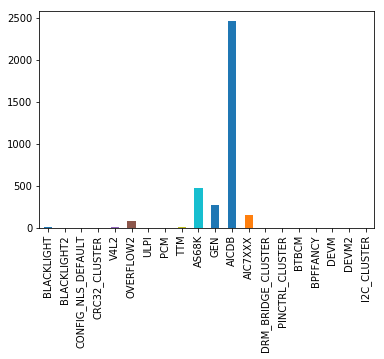

In [49]:
patternfirst_frequencies = error_patternfirst[pattern_name].apply(nb_patterns, axis=0)
patternfirst_frequencies.plot(kind='bar')
patternfirst_frequencies

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree


TESTING_SIZE= 0.001 #0.99 # 0.001 # 0.9
X_train, X_test, y_train, y_test = train_test_split(
    rawtuxdata
    .drop(columns=["cid"])
    .drop(columns=size_methods)
    .drop(columns=compilation_status_column_name), 
    rawtuxdata[compilation_status_column_name], test_size=TESTING_SIZE, random_state=0)  
clf = tree.DecisionTreeClassifier() #GradientBoostingClassifier(n_estimators=100) #RandomForestRegressor(n_estimators=100) #   #GradientBoostingRegressor(n_estimators=100)  
clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, balanced_accuracy_score

y_pred = clf.predict(X_test)

acc = accuracy_score (y_test, y_pred)
prec = precision_score (y_test, y_pred)
reca = recall_score (y_test, y_pred)
f1 = f1_score (y_test, y_pred)
balance_acc = balanced_accuracy_score (y_test, y_pred)
print("Accuracy score:", acc)
print("Precision score:", prec)
print("Recall score:", reca)
print("F1 score:", f1)
print("Balance accuracy score:", balance_acc)

In [ ]:
del X_train
del X_test 
del y_train 
del y_test

In [ ]:
import graphviz 

def printTree(clf, feature_names):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         filled=True, rounded=True,
                         special_characters=True)  
    graph = graphviz.Source(dot_data)  
    graph.render("TUXML_compilation_failures")
    
printTree(clf, rawtuxdata.drop(columns=["cid"]).drop(columns=size_methods).drop(columns=compilation_status_column_name).columns)

In [ ]:
from sklearn.tree import _tree

def tree_to_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    #print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, previous_rules):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            #print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], previous_rules+[name + " <= " + str(threshold)])
            #print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], previous_rules+[name + " > " + str(threshold)])
        else:
            print(" & ".join(previous_rules) + " ---> " + str(tree_.value[node]))

    recurse(0, [])
    
tree_to_rules(clf, rawtuxdata.drop(columns=["cid"]).drop(columns=size_methods).drop(columns=compilation_status_column_name).columns)

In [ ]:
def tree_to_failure_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    #print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, previous_rules, acc):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            #print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], previous_rules+[name + " <= " + str(threshold)], acc)
            #print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], previous_rules+[name + " > " + str(threshold)], acc)
        else:
            if tree_.value[node][0][0] > tree_.value[node][0][1]:
                #print(" & ".join(previous_rules) + " ---> " + str(tree_.value[node]))
                acc.append(" & ".join(previous_rules))

    acc = []
    recurse(0, [], acc)
    return acc
    
all_paths = tree_to_failure_rules(clf, rawtuxdata.drop(columns=["cid"]).drop(columns=size_methods).drop(columns=compilation_status_column_name).columns)

In [ ]:

    
def find_rule_for_configuration(tree, feature_names, configuration):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    def recurse(node, previous_rules, configuration):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            #print ("{}if {} <= {}:".format(indent, name, threshold))
            if configuration[name] <= threshold:
                recurse(tree_.children_left[node], previous_rules+[name + " <= " + str(threshold)], configuration)
            #print ("{}else:  # if {} > {}".format(indent, name, threshold))
            else:
                recurse(tree_.children_right[node], previous_rules+[name + " > " + str(threshold)], configuration)
        else:
            #if tree_.value[node][0][0] > tree_.value[node][0][1]:
            print(" & ".join(previous_rules))
    
    recurse(0, [], configuration)
    
def find_rule_for_configuration_id(cid):
    return find_rule_for_configuration(clf, rawtuxdata.drop(columns=["cid"]).drop(columns=size_methods).drop(columns=compilation_status_column_name).columns, rawtuxdata.query("cid == " + str(cid)).iloc[0]) 

find_rule_for_configuration_id(92072)

In [ ]:
rawtuxdata.query("AIC7XXX_BUILD_FIRMWARE == 1 | AIC79XX_BUILD_FIRMWARE == 1 | WANXL_BUILD_FIRMWARE == 1").shape

In [ ]:
rawtuxdata.query("(AIC7XXX_BUILD_FIRMWARE == 0 & AIC79XX_BUILD_FIRMWARE == 0) & WANXL_BUILD_FIRMWARE == 1")['compile_success'].unique()

In [ ]:
rawtuxdata.query("AIC7XXX_BUILD_FIRMWARE == 0 & AIC79XX_BUILD_FIRMWARE == 0 & WANXL_BUILD_FIRMWARE == 0 & compile_success == False").shape

In [ ]:
'''
basic conclusion: bug GENERIC_ALLOCATOR + DRM_VBOXVIDEO is always masked by firmwares-like failures
'''
generic_allocator_mask_firmwares = rawtuxdata.query("GENERIC_ALLOCATOR == 0 & DRM_VBOXVIDEO == 2 & (AIC7XXX_BUILD_FIRMWARE == 1 | AIC79XX_BUILD_FIRMWARE == 1 | WANXL_BUILD_FIRMWARE == 1)  & compile_success == False")
print("generic allocator bug with firmwares' failures", generic_allocator_mask_firmwares.shape)
print()
print()
for cid in generic_allocator_mask_firmwares['cid']:
    print ("###### configuration id", cid)
    err_pattern = error_pattern.query("cid == " + str(cid)).iloc[0]
    for err in ErrorLog:
        if (err_pattern[err.name]):
            print(err)
    error_messages = errorlogs.query("cid == " + str(cid)).iloc[0]['error_message'].splitlines()
    for error in error_messages:
        if "Cyclomatic " not in error:
            print(error)
    print()
    print()




In [ ]:
'''
basic conclusion: bug GENERIC_ALLOCATOR + DRM_VBOXVIDEO is not masked by other failures
but may mask other failures 
'''

generic_allocator_mask_notfirmware = rawtuxdata.query("GENERIC_ALLOCATOR == 0 & DRM_VBOXVIDEO == 2 & ~(AIC7XXX_BUILD_FIRMWARE == 1 | AIC79XX_BUILD_FIRMWARE == 1 | WANXL_BUILD_FIRMWARE == 1)  & compile_success == False")


print("generic allocator bug *without* firmwares' failures", generic_allocator_mask_notfirmware.shape)
print()
print()
for cid in generic_allocator_mask_notfirmware['cid']:
    err_pattern = error_pattern.query("cid == " + str(cid)).iloc[0]
    if not (err_pattern[ErrorLog.GEN.name]):
        print ("###### configuration id", cid)
        print("GENERIC allocator NOT found")
    #else:
    #    for err in ErrorLog:
    #        if (err_pattern[err.name]):
    #            print(err)
   

In [ ]:
# ~(AIC7XXX_BUILD_FIRMWARE == 1 | AIC79XX_BUILD_FIRMWARE == 1 | WANXL_BUILD_FIRMWARE == 1)  &
# Mathieu: I'm deactivating it, it's time-consuming and error-prone 
if False:
    for path1 in all_paths[::-1]:
        # collect all cids related to a path
        path_cids = rawtuxdata.query(path1 + " & compile_success == False")['cid'].values
        spath_cids = set(path_cids)
        print (path1)
        for path2 in all_paths[::-1]:
            if (path1 != path2):                
                for cid in path_cids:
                    # report whether an alternate path/rule can match the cid 
                    #print (cid)
                    overlap = rawtuxdata.query(path2 + " & compile_success == False & cid == " + str(cid)) #['cid'].values
                    #overlap = list(spath_cids & set(path_cids2)) 
                    if len(overlap) > 0:
                        print(path1, "also hold with\n", path2, "=> #", overlap)
                        print()
    
       
#    for path2 in all_paths:
#        if (path1 != path2):
#            overlap = len(rawtuxdata.query(path1 + " | ~(" + path2 + ") & compile_success == False").index)
#            if  overlap > 0:
#                print(path1, "also hold with\n", path2, "=> #", overlap)
#                print()
        
        
#

In [52]:
# TODO: classification on clusters!
rawtuxdata = pd.merge(rawtuxdata, error_patternfirst, on='cid', how='outer')

In [53]:
rawtuxdata.shape, error_patternfirst.shape

((69362, 12674), (3507, 20))

In [54]:
rawtuxdata.query(ErrorLog.AICDB.name + " == True").shape
# rawtuxdata['cid']
# configwithclusters['cid']

(2464, 12674)

In [55]:
for err in ErrorLog:
    rawtuxdata[err.name] = rawtuxdata[err.name].fillna(False)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn import tree

TESTING_SIZE_CLUSTER= 0.1 #0.99 # 0.001 # 0.9
X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(
    rawtuxdata
    .drop(columns=["cid"])
   # .drop(columns=["nb_patterns"])
    .drop(columns=pattern_name)
    .drop(columns=size_methods)
    .drop(columns=compilation_status_column_name), 
    rawtuxdata[[ErrorLog.AS68K.name, ErrorLog.AICDB.name]], test_size=TESTING_SIZE_CLUSTER, random_state=0)  

# rawtuxdata[pattern_name]

clf_cluster = tree.DecisionTreeClassifier() #GradientBoostingClassifier(n_estimators=100) #RandomForestRegressor(n_estimators=100) #   #GradientBoostingRegressor(n_estimators=100)  
clf_cluster.fit(X_train_cluster, y_train_cluster)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
import graphviz 
ft_names =  rawtuxdata.drop(columns=["cid"]).drop(columns=pattern_name).drop(columns=size_methods).drop(columns=compilation_status_column_name).columns

dot_data = tree.export_graphviz(clf_cluster, out_file=None, 
                         feature_names=ft_names,  
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("TUXML_compilation_failures_clusters")

'TUXML_compilation_failures_clusters.pdf'

In [ ]:
#error_patternfirst[ErrorLog.I2C.name]
#rawtuxdata.query("cid == 96730")

In [ ]:
rawtuxdata[pattern_name]

In [ ]:
for path in all_paths[::-1]: # all_paths[::-1]:
    configs_path = rawtuxdata.query(path + " & compile_success == False")
    clusters_path = []
    for cid, cfg in configs_path.iterrows():  
        cluster_cfg = []
        for err in ErrorLog:
            if(cfg[err.name]):
                cluster_cfg.append(err.name)                
        assert(len(set(cluster_cfg)) == 1)
        clusters_path.append(cluster_cfg[0])
                
    print(path, "=>", set(clusters_path))
    print()
        
    # configs_path['cid'].values
    

In [69]:
# rawtuxdata['PM_STD_PARTITION']  

0            0
1        46230
2        46231
3        46232
4        46233
5        46234
6        46235
7        46236
8        46237
9        46238
10       46239
11       46240
12       46241
13       46242
14       46243
15       46245
16       46260
17       46246
18       46247
19       46248
20       46249
21       46250
22       46251
23       46252
24       46253
25       46254
26       46255
27       46256
28       46257
29       46258
         ...  
69332    23099
69333    23100
69334    23101
69335    23102
69336    23103
69337    23104
69338    23105
69339    23106
69340    23107
69341    23108
69342    23109
69343    23110
69344    23112
69345    23127
69346    23113
69347    23114
69348    23115
69349    23116
69350    23117
69351    23118
69352    23119
69353    23120
69354    23121
69355    23122
69356    23123
69357    23124
69358    23125
69359    23126
69360    52020
69361    69361
Name: PM_STD_PARTITION, Length: 69362, dtype: int64